In [1]:
#%pip install covid

In [13]:
from covid import Covid
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
covid = Covid(source="worldometers")

### Get data

In [7]:
df = pd.DataFrame(covid.get_data())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country                   230 non-null    object
 1   confirmed                 230 non-null    int64 
 2   new_cases                 230 non-null    int64 
 3   deaths                    230 non-null    int64 
 4   recovered                 230 non-null    int64 
 5   active                    230 non-null    int64 
 6   critical                  230 non-null    int64 
 7   new_deaths                230 non-null    int64 
 8   total_tests               230 non-null    int64 
 9   total_tests_per_million   230 non-null    object
 10  total_cases_per_million   230 non-null    object
 11  total_deaths_per_million  230 non-null    object
 12  population                230 non-null    object
dtypes: int64(8), object(5)
memory usage: 23.5+ KB


### Prepare data

In [9]:
sorted = df.sort_values(by=['confirmed'], ascending=False)

In [11]:
excluded = sorted[~sorted.country.isin(['Europe', 'South America', 'Asia', 'World', 'North America', 'Africa'])]

In [12]:
top10 = excluded.head(10)
print(top10)

    country  confirmed  new_cases  deaths  recovered   active  critical  \
8       USA   33179141      29401  591056   25823730  6764355      9469   
9     India   19919715     370059  218945   16281738  3419032      8944   
10   Brazil   14754910      28935  407639   13242665  1104606      8318   
11   France    5652247       9888  104819    4637053   910375      5585   
12   Turkey    4875388      25980   40844    4480381   354163      3532   
13   Russia    4823255       8697  110862    4443922   268471      2300   
14       UK    4420201       1671  127538    4221582    71081       185   
15    Italy    4044762       9148  121177    3492679   430906      2524   
16    Spain    3524077          0   78216    3206273   239588      2308   
17  Germany    3425598      13225   83826    3024600   317172      5049   

    new_deaths  total_tests total_tests_per_million total_cases_per_million  \
8          306    448944718                       0                   99752   
9         3422  

In [25]:
x = top10.country
y1 = top10.confirmed
y2 = top10.active
y3 = top10.deaths
y4 = top10.recovered

#### Line chart

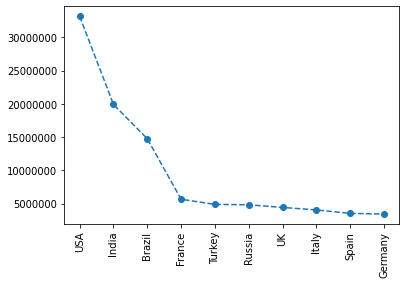

In [44]:
plt.plot(x, y1, 'o--')
ax = plt.gca()  # get the current Axes instance
ax.ticklabel_format(useOffset=False, style='plain', axis='y')  # remove offset for y axis
plt.xticks(rotation=90)  # rotate x axis
plt.show()

#### Bar chart

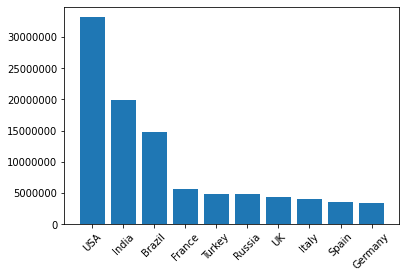

In [56]:
plt.bar(x, y1)
ax = plt.gca()  # get the current Axes instance
ax.ticklabel_format(useOffset=False, style='plain', axis='y')  # remove offset for y axis
plt.xticks(rotation=45)
plt.show()

#### Multiple line charts by country

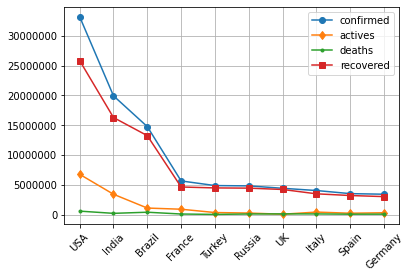

In [59]:
plt.plot(x, y1, 'o-')
plt.plot(x, y2, 'd-')
plt.plot(x, y3, '.-')
plt.plot(x, y4, 's-')
plt.legend(['confirmed', 'actives', 'deaths', 'recovered'], loc='upper right')
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')  # remove offset for y axis
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Multiple bar charts by status

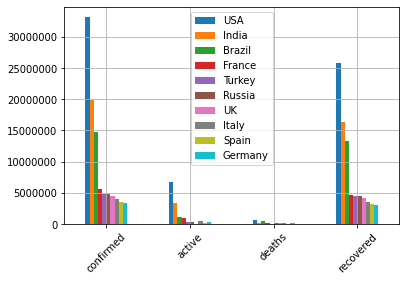

In [77]:
df2 = pd.DataFrame([y1, y2, y3, y4])  # transpose the 4 y's
df2.plot.bar()
plt.legend(x, loc='upper center')
plt.xticks(rotation=45)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')  # remove offset for y axis
plt.grid()
plt.show()

#### Stacked bar by status

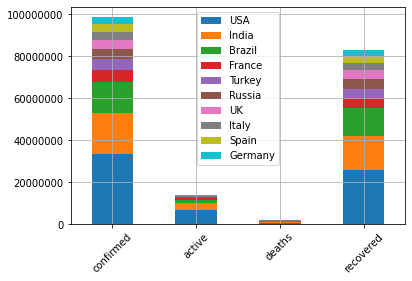

In [100]:
df2.plot(kind='bar', stacked=True)
plt.legend(x, loc='upper center')
plt.xticks(rotation=45)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')  # remove offset for y axis
plt.grid()
plt.show()

#### Pie chart by confirmed

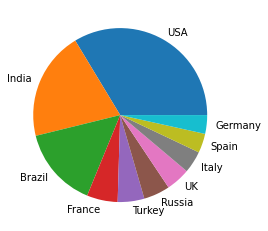

In [99]:
plt.pie(y1, labels=x)
plt.show()

#### Scatter points by country

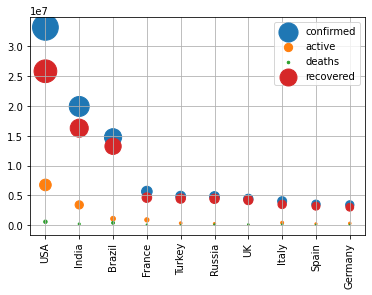

In [106]:
factor=0.00002
plt.scatter(x, y1, s=y1*factor);
plt.scatter(x, y2, s=y2*factor);
plt.scatter(x, y3, s=y3*factor);
plt.scatter(x, y4, s=y4*factor);
plt.legend(df2.index, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()